In [2]:
'''
EXTENDED KALMAN

# MODEL
x' = f(x,u) + w_1
z = h(x) +  w_2

initialization for model

x(0) = 0 # initial guess for mean
P(0) = 0 # initial guess for variance

predict update.

x = f(x,u) + K*(w_1 - h(x))
P' = f_x*P + P*f_x - K*h_x*P + Q

where f_x is df/dx
and h_x is dh/dx
''';



In [4]:
'''
Kalman–Bucy filter (continuous time Kalman)

# MODEL 
x' = F(t)*x(t) + B(t)*u(t) + w_1
z = H(t)*x(t) + w_t

# PREDICTOR
x' = F*x + B*u + K*(z-H*x)
P' = F*P + P*F + Q - K*R*K
K = P*H*inv(R)

Q = covariance of process noise (w_1)
R = covariance of observation noise (w_2)
F = state transition model
H = observation model
B = control input model

''';

In [23]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [6]:
'''
1d Kalman bucy

x' = a*x + b*u + w_1
z = c*x + w_2

# PREDICTOR

x' = a*x + b*u + k*(z-c*x)
p' = 2*a*p + q - k*k*r
k = p*c*r
''';

In [752]:
def zero(time):
    return 0.0

def sin(time,ampl,freq,phase):
    return ampl*np.sin(freq*time+phase)
    
def lin(time,scale,offset):
    return scale*time+offset

def noise(time,ampl):
    return np.random.normal(0,ampl)

In [916]:
# this is a backup
params = {
    'a': 1.0,
    'b': 0.0,
    'c': 2.0,
    'r': 1.0,
    'q': 0.0,
    'tc': 10000.0,
    'hwtc': 200000.0
}
# this is the differen
params = {
    'a': 2.0,
    'b': 0.0,
    'c': 2.0,
    'r': 0.5,
    'q': 0.0,
    'tc': 10000.0,
    'hwtc': 200000.0,
    "p0": 1.0,
    "x0": 1.0
}

In [917]:

def getps(names):
    vals = []
    for name in names:
        vals.append(float(params[name]))
    return tuple(vals)

def geti(vals,ind):
    v = list(map(lambda v: v[ind], vals))
    return np.array(v)

tc,hwtc = getps(['tc','hwtc'])
print("time-const: %f" % (tc/hwtc))

def kalman(vect,time,ufun,zfun):
    a,b,h = getps(['a','b','c'])
    r,q = getps(['r','q'])
    tc1,tc2 = getps(['tc','tc'])
    x = float(vect[0])
    p = float(vect[1])
    #u = ufun(time)
    u = 0.0
    z = float(zfun(time))
    rinv = r**-1.0
    k = p*h*rinv
    dx = tc1*(a*x + b*u +k*z-k*h*x)
    dp = tc2*(2.0*a*p + q -k*k*r)
    return [dx,dp]


    

time-const: 0.050000


In [918]:
base_freq = 1000.0

def fn(time):
    sig= sin(time,3.0,1.0*base_freq,0.0) + sin(time,3.0,0.375*base_freq,0.52) 
    nz = sin(time,3.0,50.0*base_freq,1.1432)*lin(time*100,0.5,0)
    return (sig+nz)/10.0

In [919]:

x0,p0 = getps(['x0','p0'])
times = np.arange(0,60/base_freq,1.0e-1/base_freq)
z = list(map(lambda t: fn(t), times))
ys = odeint(kalman, [x0,p0], times,args=(zero,fn))

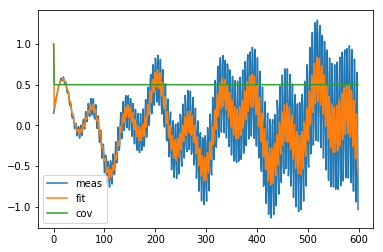

In [920]:
plt.plot(z,label="meas")
plt.plot(geti(ys,0),label="fit")
plt.plot(geti(ys,1),label="cov")
plt.legend()